In [350]:
import pandas as pd
import os
import sys
from pathlib import Path
import numpy as np
import json
import ipdb
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
hoops_dir = Path("/Users/danielfriedman/Desktop/hoops")
data_dir = hoops_dir / "data"
sys.path.append(hoops_dir.as_posix())

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

In [705]:
x = pd.read_csv("data/2021-22/0022100001.csv")


In [716]:
from pipeline import score_by_score
importlib.reload(score_by_score)
seasons = [f"20{year}-{year+1}" for year in range(17, 22)]
# seasons = [f"20{year}-{year+1}" for year in range(19, 22)]
sbs = score_by_score.get_sbs(seasons)


In [717]:
time_mod = 1
score_mod = 1
sbs['mins'] = sbs['time'] // time_mod
sbs['home_lead'] = (sbs['home_score'] - sbs['vis_score']) // score_mod


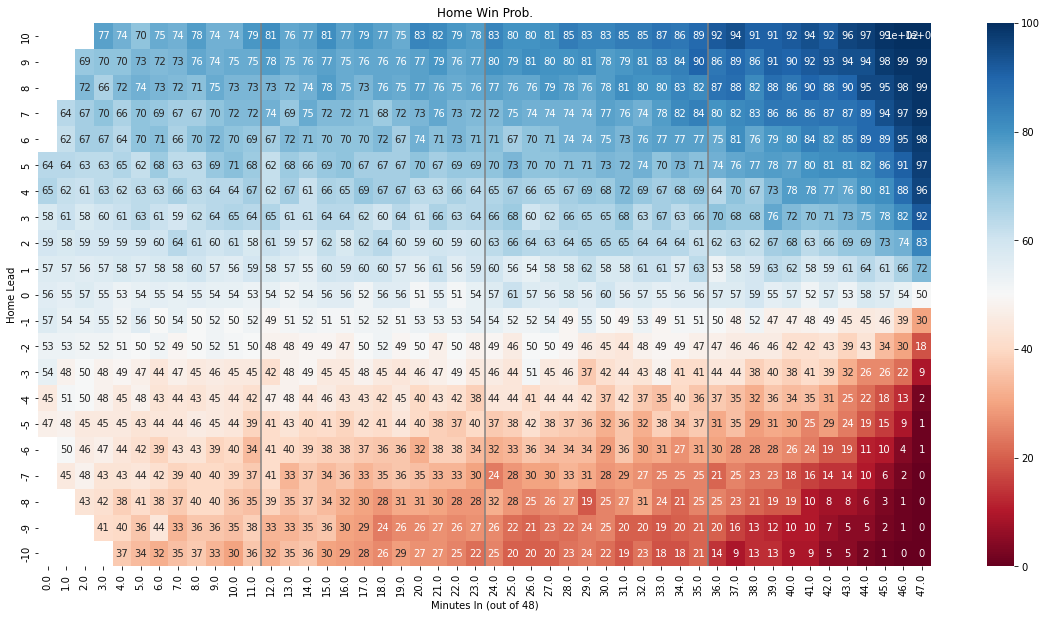

In [782]:
x = sbs.drop_duplicates(subset=['game_id', 'mins', 'home_lead']).groupby(["mins", "home_lead"]).agg({'home_win': ['count', 'mean']})['home_win'].reset_index().rename(columns={'mean':'win_pct'})
x['win_pct'] = (x['win_pct'] * 100).astype(int)
x = x.loc[x['count'] >= 100]
x = x.pivot(index='home_lead', columns='mins', values='win_pct')
x.index = np.array(list(x.index)) * score_mod
x.columns = np.array(list(x.columns)) * time_mod

fig, ax = plt.subplots(figsize=(20, 10))
ax.axvline(12, color='gray')
ax.axvline(24, color='gray')
ax.axvline(36, color='gray')
sns.heatmap(x.loc[10:-10:-1, 0:47], annot=True, cmap="RdBu")
ax.set(ylabel="Home Lead", xlabel="Minutes In (out of 48)", title="Home Win Prob.");



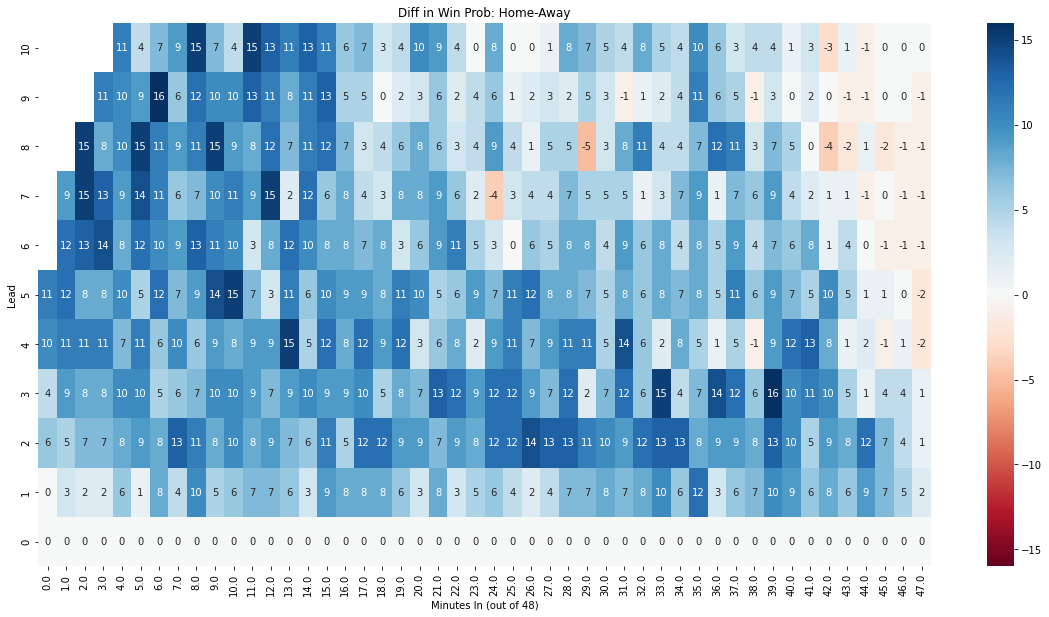

In [783]:
x = sbs.drop_duplicates(subset=['game_id', 'mins', 'home_lead']).groupby(["mins", "home_lead"]).agg({'home_win': ['count', 'mean']})['home_win'].reset_index().rename(columns={'mean':'win_pct'})
x['win_pct'] = (x['win_pct'] * 100).astype(int)
x = x.loc[x['count'] >= 100]
x = x.pivot(index='home_lead', columns='mins', values='win_pct')
x.index = np.array(list(x.index)) * score_mod
x.columns = np.array(list(x.columns)) * time_mod
x = abs(x-50)
home_lead_pcts = x.loc[10:0:-1, :47]
vis_lead_pcts = x.loc[-10:0:1, :47]
vis_lead_pcts.index *= -1 
diffs = home_lead_pcts - vis_lead_pcts
vmax = max(abs(diffs.min().min()), diffs.max().max())

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(diffs, annot=True, cmap="RdBu", vmin=-vmax, vmax=vmax)
ax.set(ylabel="Lead", xlabel="Minutes In (out of 48)", title="Diff in Win Prob: Home-Away");
# A home lead is almost universally harder to blow than an away lead, but that's mostly true early on and gets less and less true

